In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os

In [ ]:
os.chdir("C:\Users\Sweta Das\Music\Population")

In [3]:
df = pd.read_excel("Population.xlsx") 
df

,Unnamed: 0,Population,Unnamed: 2,Average annual population growth,Population age composition,Unnamed: 5,Unnamed: 6,Dependency ratio,Unnamed: 8,Crude death rate,Crude birth rate
0,NaN,NaN,NaN,NaN,Ages 0-14,Ages 15-64,Ages 65+,young,old,NaN,NaN
1,NaN,millions,NaN,%,%,%,%,% of working-age population,% of working-age population,"per 1,000 people","per 1,000 people"
2,NaN,2000,2022.0,2000-2022,2022,2022,2022,2022,2022,2021,2021
3,Afghanistan,19.5,41.1,3.4,43,54,2,79,4,7,36
4,Albania,3.1,2.8,-0.5,16,67,17,24,25,11,10
...,...,...,...,...,...,...,...,...,...,...,...
224,Sub-Saharan Africa,671.2,1211.2,2.7,42,55,3,76,6,9,35
225,Low income,382.6,703.7,2.8,42,55,3,76,6,8,35
226,Lower middle income,2259.9,3190.2,1.6,30,64,6,46,9,9,21
227,Upper middle income,2375.3,2784.4,0.7,20,68,12,30,17,8,11


In [4]:
df.shape

(229, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        226 non-null    object 
 1   Population                        228 non-null    object 
 2   Unnamed: 2                        227 non-null    float64
 3   Average annual population growth  228 non-null    object 
 4   Population age composition        229 non-null    object 
 5   Unnamed: 5                        229 non-null    object 
 6   Unnamed: 6                        229 non-null    object 
 7   Dependency ratio                  229 non-null    object 
 8   Unnamed: 8                        229 non-null    object 
 9   Crude death rate                  228 non-null    object 
 10  Crude birth rate                  228 non-null    object 
dtypes: float64(1), object(10)
memory usage: 19.8+ KB


In [6]:
df = pd.read_excel("Population.xlsx") 
print(df.columns)

Index(['Unnamed: 0', 'Population', 'Unnamed: 2',
       'Average annual population growth', 'Population age composition',
       'Unnamed: 5', 'Unnamed: 6', 'Dependency ratio', 'Unnamed: 8',
       'Crude death rate', 'Crude birth rate'],
      dtype='object')


In [8]:
# Print unique values for Population age composition from 0-14
print(df['Population age composition'].unique())

# Print unique values for Population age composition from 15-64
print(df['Unnamed: 5'].unique())

# Print unique values for Population age composition for 65+
print(df['Unnamed: 6'].unique())

['Ages 0-14' '%' 2022 43 16 31 27 13 45 19 23 20 18 14 26 17 28 42 15 22
 33 44 46 29 48 12 21 38 47 41 30 25 39 35 40 36 37 24 32 34 49 11]
['Ages 15-64' '%' 2022 54 67 63 66 72 52 71 65 68 69 76 64 55 70 75 49 50
 58 51 56 62 57 61 60 59 73 74 83 78 53]
['Ages 65+' '%' 2022 2 17 6 7 15 3 11 12 13 16 20 9 4 5 18 10 22 19 8 14
 21 23 24 30 36]


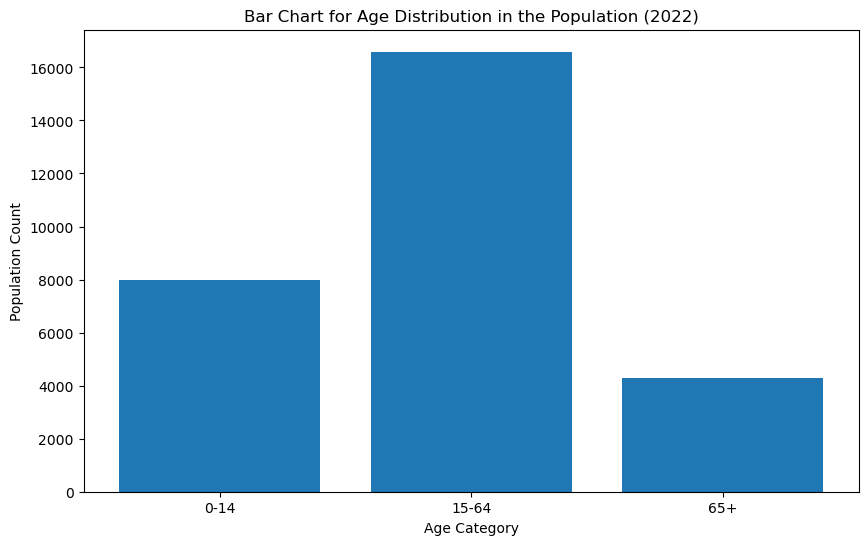

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel("Population.xlsx")

# Convert columns to numeric data types and handle missing values (replace with median age)
df['Population age composition'] = pd.to_numeric(df['Population age composition'], errors='coerce')
df['Unnamed: 5'] = pd.to_numeric(df['Unnamed: 5'], errors='coerce')
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

# Replace missing age values with the median age of the population
median_age_column5 = df['Population age composition'].median()
median_age_column6 = df['Unnamed: 5'].median()
median_age_column7 = df['Unnamed: 6'].median()

df['Population age composition'].fillna(median_age_column5, inplace=True)
df['Unnamed: 5'].fillna(median_age_column6, inplace=True)
df['Unnamed: 6'].fillna(median_age_column7, inplace=True)

# Define age categories
age_categories = ['0-14', '15-64', '65+']

# Create a new DataFrame with columns for each age category
df_stacked = df[['Population age composition', 'Unnamed: 5', 'Unnamed: 6']].copy()
df_stacked.columns = age_categories

# Calculate the sum of each age category
total_population = df_stacked.sum()

# Create a bar chart for age distribution
plt.figure(figsize=(10, 6))
plt.bar(age_categories, total_population)
plt.xlabel('Age Category')
plt.ylabel('Population Count')
plt.title('Bar Chart for Age Distribution in the Population (2022)')
plt.show()